In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tools import ScalarTool


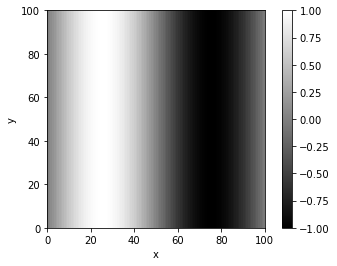

In [11]:
# Parameters
N=128
L=100.0

st = ScalarTool(N,L)

th=np.sin(2.0*np.pi*st.X[0]/st.L)
st.plot_scalar(th)
